
**Customer Churn Prediction:**

    A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.

    Your task as a data scientist would be to predict the propensity to churn for each customer.

**Data Dictionary**
    
    There are multiple variables in the dataset which can be cleanly divided into 3 categories:
    
    I. Demographic information about customers
    
    customer_id - Customer id 
    
    vintage - Vintage of the customer with the bank in a number of days 
    
    age - Age of customer 
    
    gender - Gender of customer 

    dependents - Number of dependents 

    occupation - Occupation of the customer 

    city - City of the customer (anonymized) 

    II. Customer Bank Relationship

    customer_nw_category - Net worth of customer (3: Low 2: Medium 1: High) 

    branch_code - Branch Code for a customer account 

    days_since_last_transaction - No of Days Since Last Credit in Last 1 year 

    III. Transactional Information

    current_balance - Balance as of today 

    previous_month_end_balance - End of Month Balance of previous month 

    average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter 

    average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to the previous quarter 

    current_month_credit - Total Credit Amount current month 

    previous_month_credit - Total Credit Amount previous month 

    current_month_debit - Total Debit Amount current month 

    previous_month_debit - Total Debit Amount previous month 

    current_month_balance - Average Balance of current month 

    previous_month_balance - Average Balance of previous month 

    churn - Average balance of customer falls below minimum balance in the next quarter (1/0) 
 

    (Note: In the same downloaded folder, you can find the dataset (churn_prediction) for this problem statement. Once you upload the final project, you will be able to download the project solution (Final project solution.zip). This folder contains the Jupyter notebook file that contains the solution to this final project problem statement.)




# 01 Importing the Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn

In [2]:
data =  pd.read_csv("churn_prediction.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


# 02 Data Preprocessing (EDA and Data Manipulation):-

### 2.1 Exploratory Data Analysis (EDA):-

In [3]:
# Checking all the datatypes
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [4]:
# CHecking the Shape of the DataFrame
data.shape

(28382, 21)

In [5]:
# Checking for Null Values

data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [6]:
# Univariate Analysis

data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

UNIVARIATE ANALYSIS FOR gender


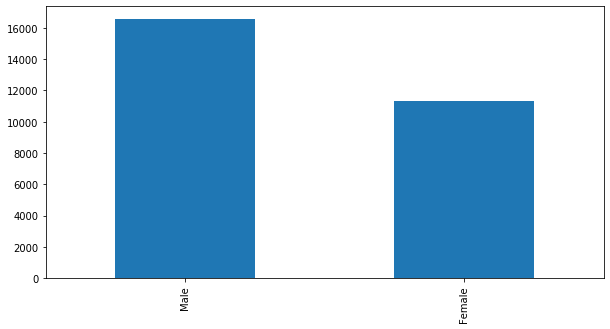

UNIVARIATE ANALYSIS FOR occupation


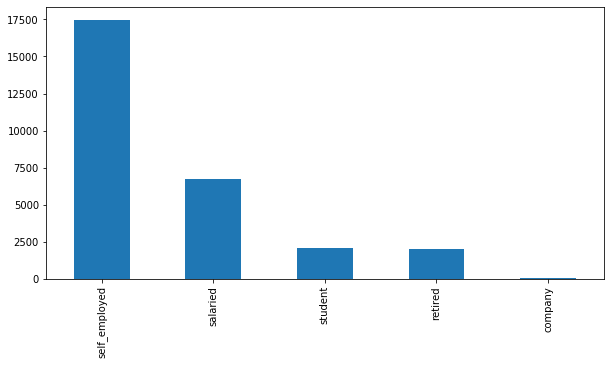

In [7]:
temp = ['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn']

for i in temp:
    if data[i].dtypes == 'object':
        print("UNIVARIATE ANALYSIS FOR " + i)
        plt.figure(figsize = (10,5))
        data[i].value_counts().plot.bar()
        #plt.xlabel(i)
        plt.show()

UNIVARIATE ANALYSIS FOR customer_id


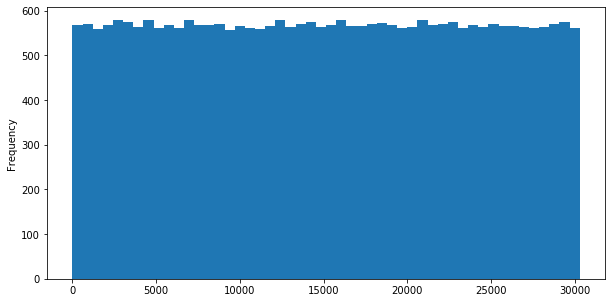

UNIVARIATE ANALYSIS FOR vintage


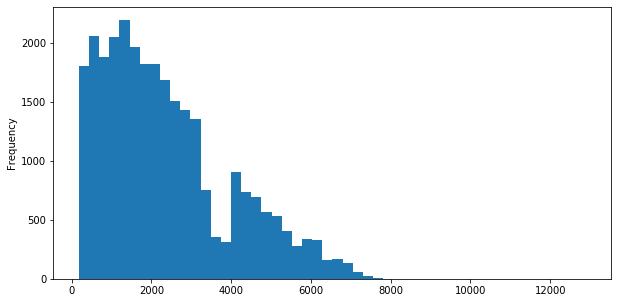

UNIVARIATE ANALYSIS FOR age


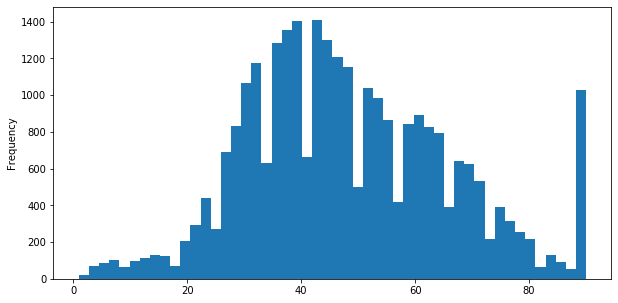

UNIVARIATE ANALYSIS FOR dependents


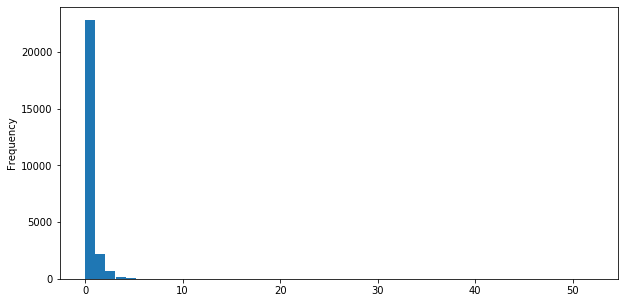

UNIVARIATE ANALYSIS FOR city


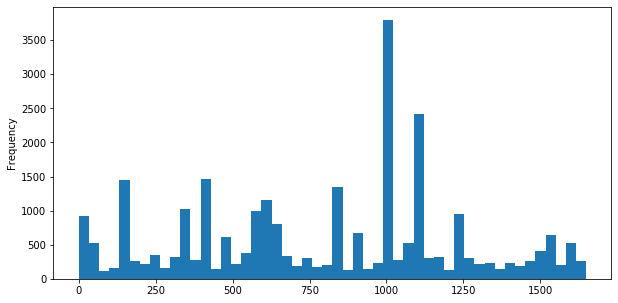

UNIVARIATE ANALYSIS FOR customer_nw_category


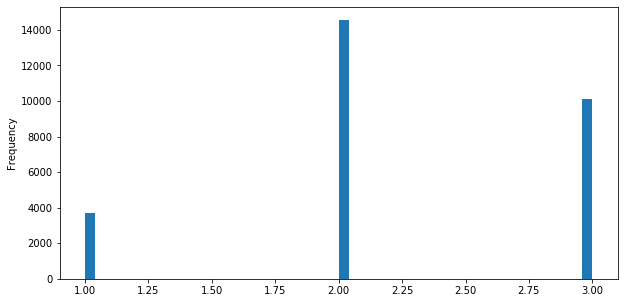

UNIVARIATE ANALYSIS FOR branch_code


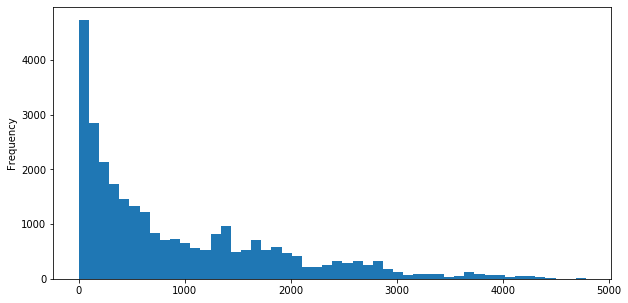

UNIVARIATE ANALYSIS FOR days_since_last_transaction


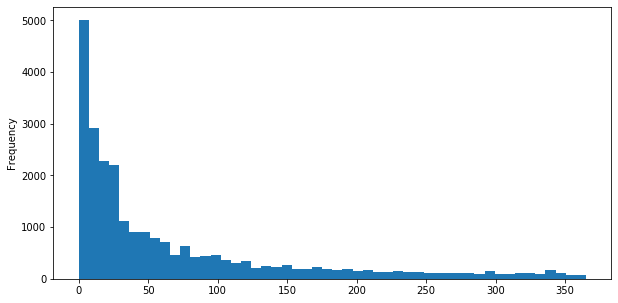

UNIVARIATE ANALYSIS FOR current_balance


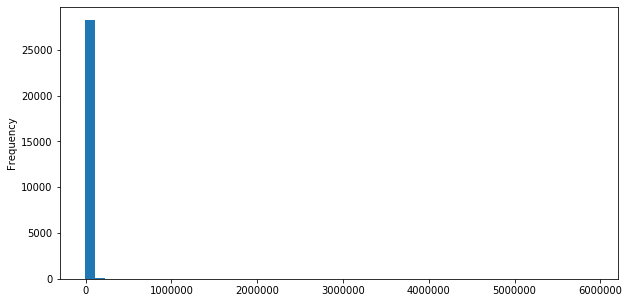

UNIVARIATE ANALYSIS FOR previous_month_end_balance


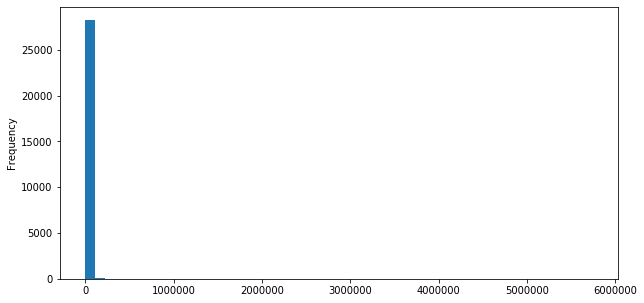

UNIVARIATE ANALYSIS FOR average_monthly_balance_prevQ


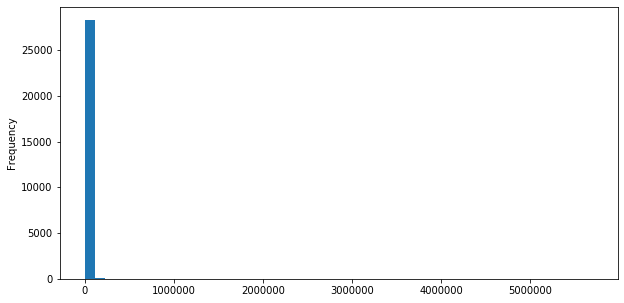

UNIVARIATE ANALYSIS FOR average_monthly_balance_prevQ2


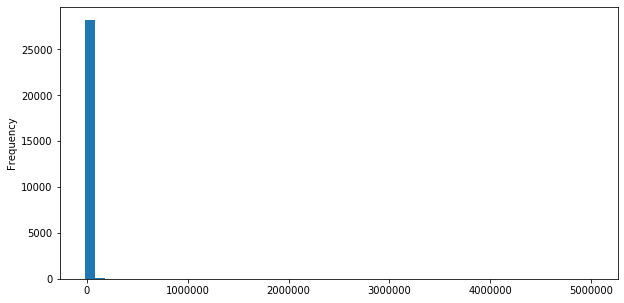

UNIVARIATE ANALYSIS FOR current_month_credit


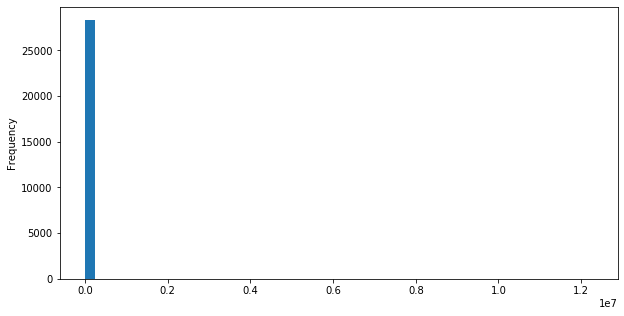

UNIVARIATE ANALYSIS FOR previous_month_credit


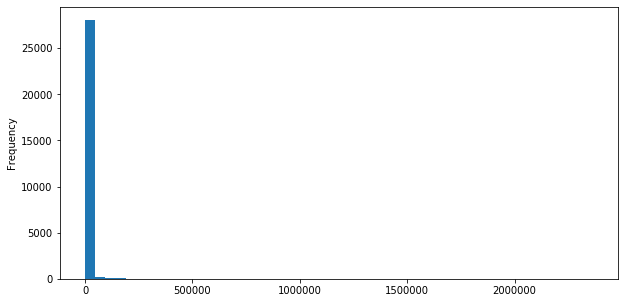

UNIVARIATE ANALYSIS FOR current_month_debit


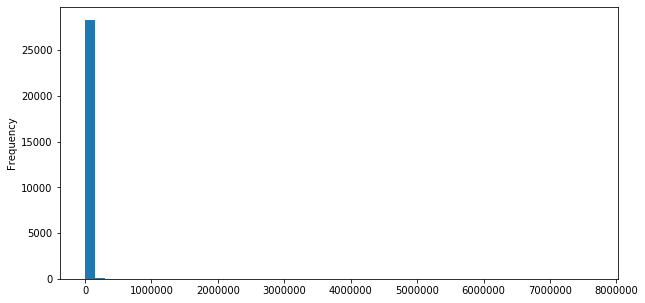

UNIVARIATE ANALYSIS FOR previous_month_debit


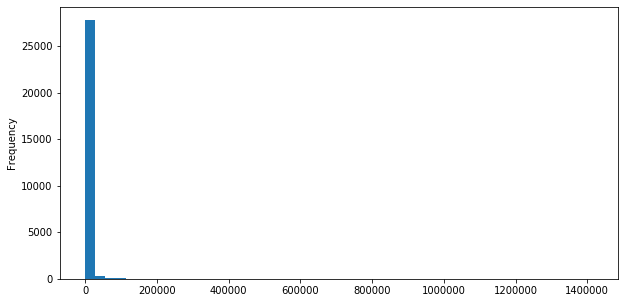

UNIVARIATE ANALYSIS FOR current_month_balance


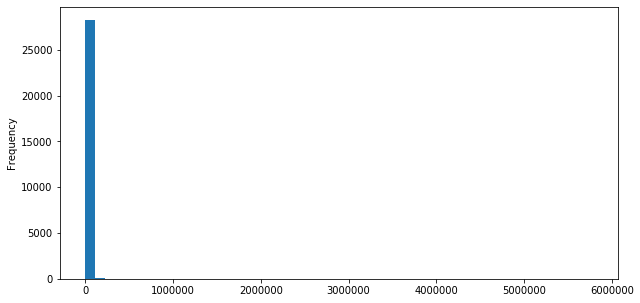

UNIVARIATE ANALYSIS FOR previous_month_balance


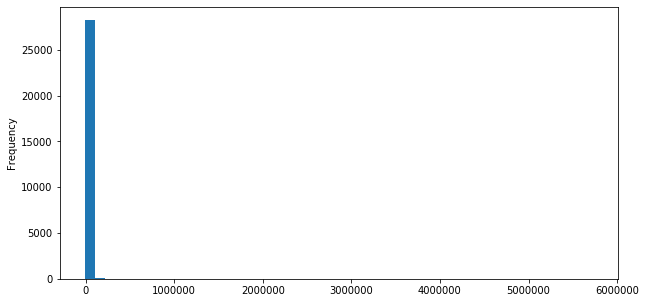

UNIVARIATE ANALYSIS FOR churn


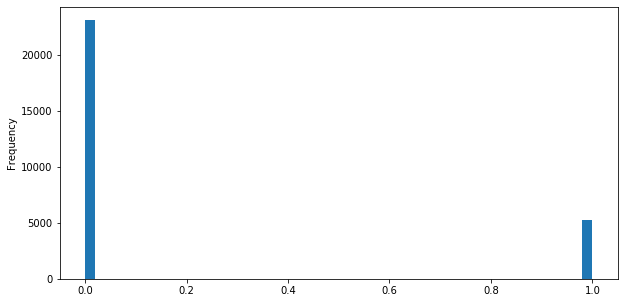

In [8]:
for i in temp:
    if data[i].dtypes != 'object':
        print("UNIVARIATE ANALYSIS FOR " + i)
        plt.figure(figsize = (10,5))
        data[i].plot.hist(bins = 50)
        #plt.xlabel(i)
        plt.show()
        
        

# Bivariate Analysis:-

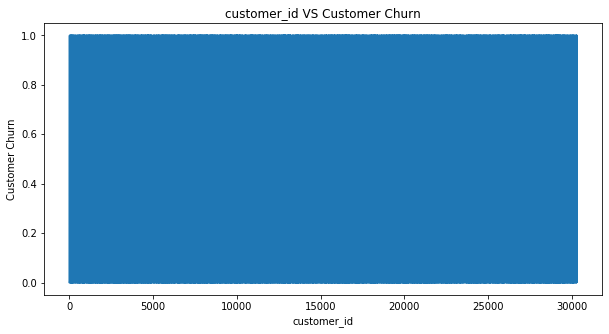

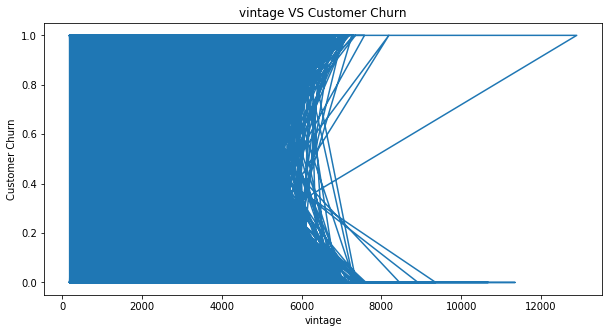

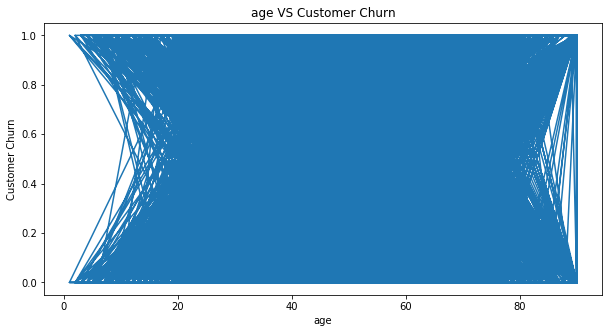

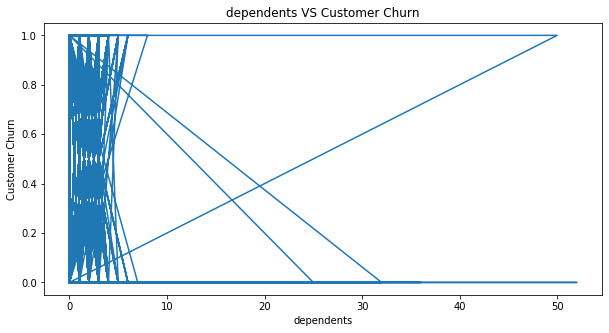

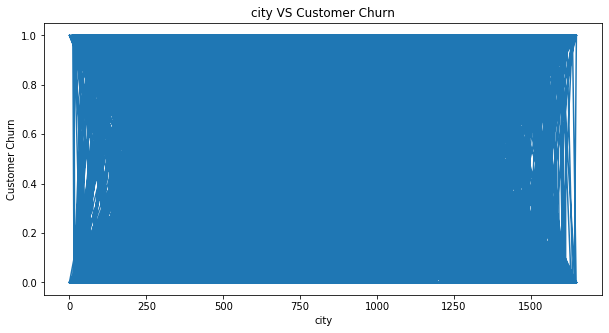

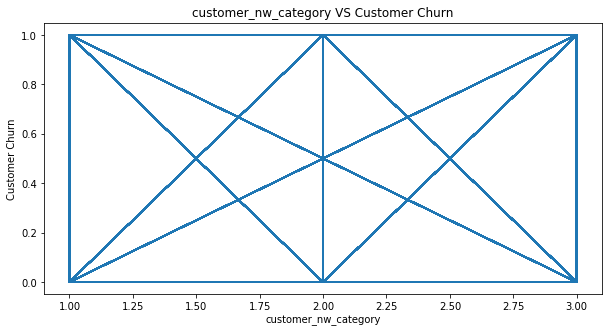

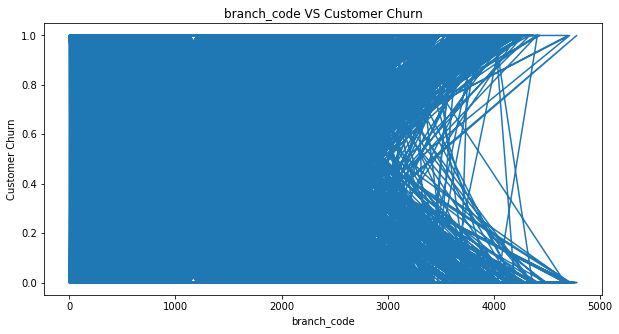

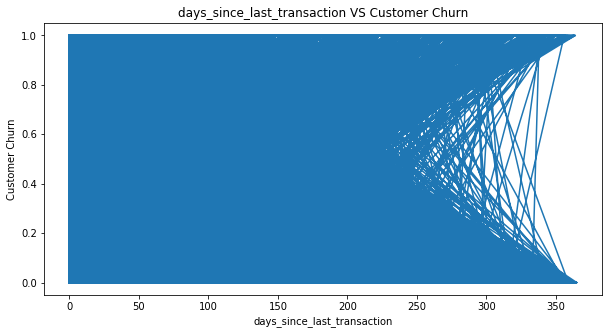

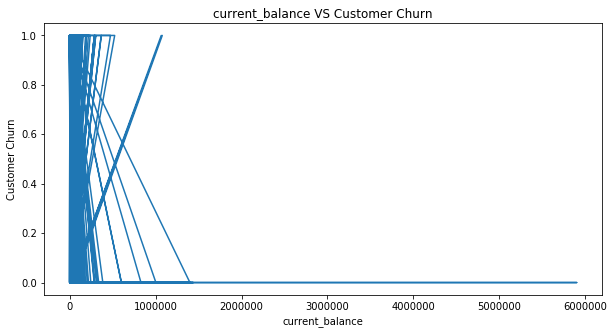

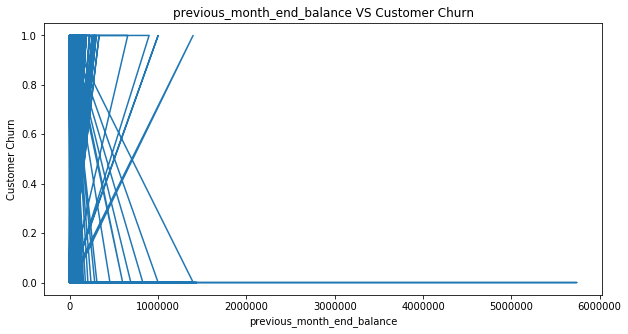

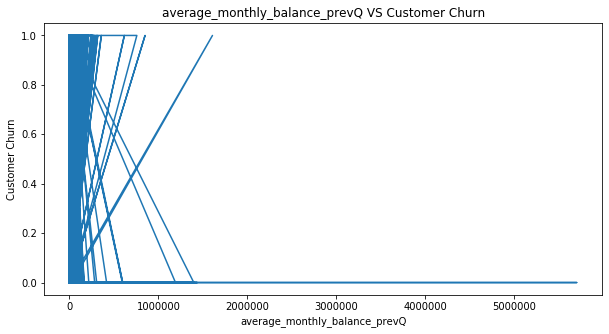

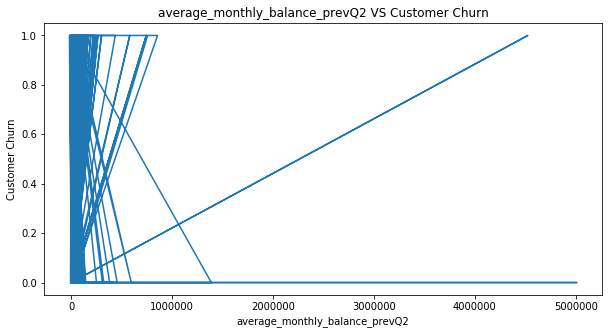

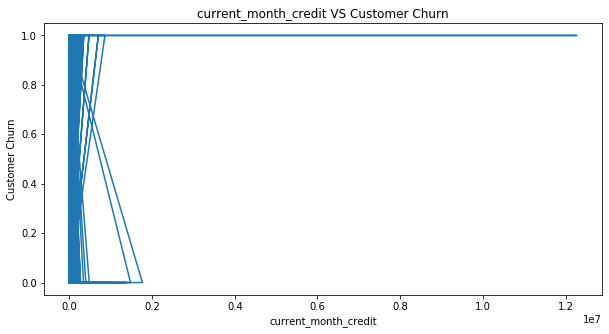

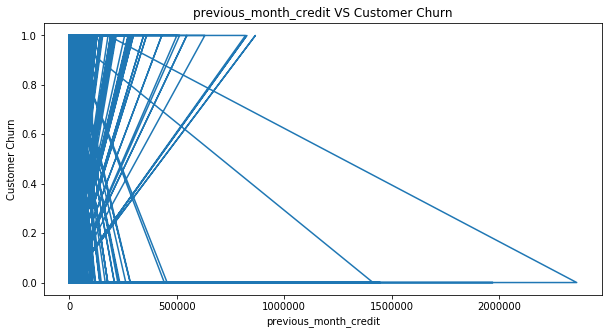

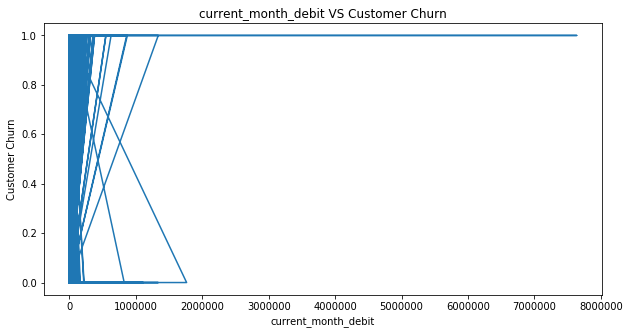

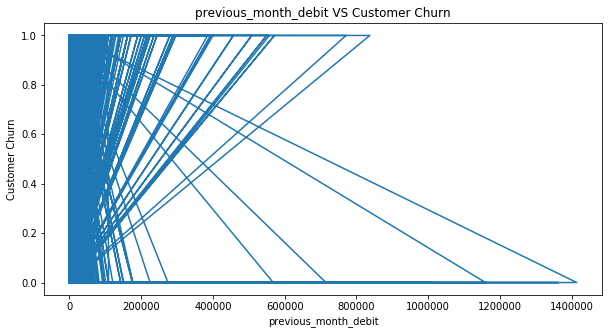

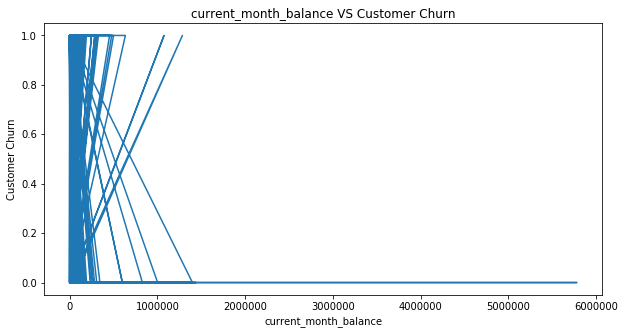

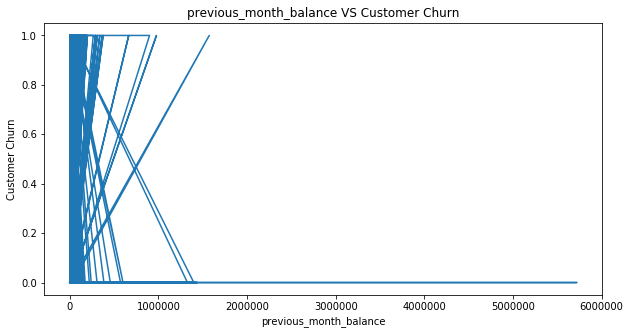

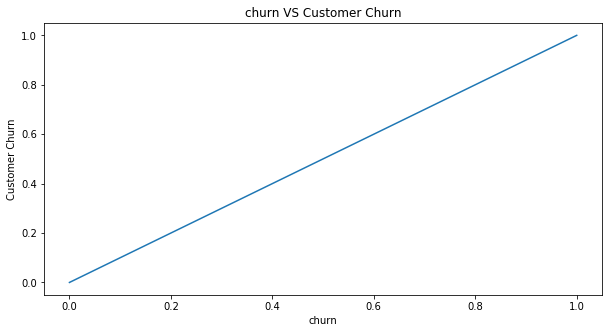

In [9]:
for i in temp:
    if data[i].dtypes!= 'object':
        plt.figure(figsize = (10,5))
        plt.plot(data[i],data["churn"])
        plt.xlabel(i)
        plt.ylabel("Customer Churn")
        plt.title(i + " VS Customer Churn")

In [10]:
data.select_dtypes('object').head()

,gender,occupation
0,Male,self_employed
1,Male,self_employed
2,Male,salaried
3,NaN,self_employed
4,Male,self_employed


In [11]:
data.select_dtypes(['int','float']).head()

,dependents,city,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,0.0,187.0,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71
1,0.0,NaN,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61
2,0.0,146.0,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14
3,NaN,1020.0,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79
4,2.0,1494.0,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16


In [12]:
#data.isnull().sum()
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [13]:
data['gender'].mode()

0    Male
dtype: object

In [14]:
data['occupation'].mode()

0    self_employed
dtype: object

In [15]:
# Imputing Catagorical Var:
data['gender']=data['gender'].fillna('Male')
data['occupation']=data['occupation'].fillna('self_employed')

In [16]:
# Imputing Continious Var:
data['dependents']= data['dependents'].fillna(data['dependents'].mean())
data['city']= data['city'].fillna(data['city'].mean())
data['days_since_last_transaction']= data['days_since_last_transaction'].fillna(data['days_since_last_transaction'].mean())

In [17]:
#data.isnull().sum()
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

# Univariate Analysis (After Tuning) :-

UNIVARIATE ANALYSIS FOR gender


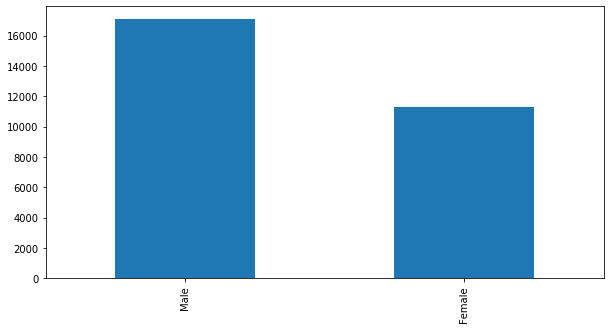

UNIVARIATE ANALYSIS FOR occupation


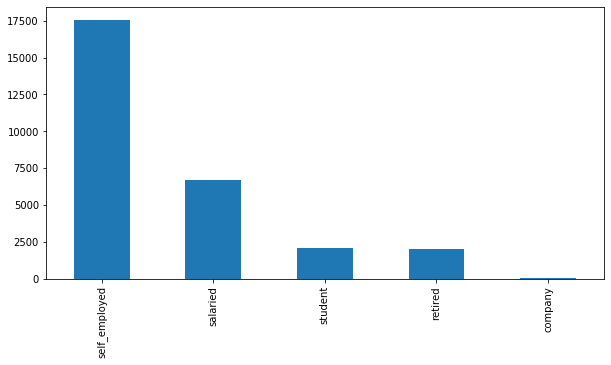

In [18]:
temp = ['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn']

for i in temp:
    if data[i].dtypes == 'object':
        print("UNIVARIATE ANALYSIS FOR " + i)
        plt.figure(figsize = (10,5))
        data[i].value_counts().plot.bar()
        #plt.xlabel(i)
        plt.show()

UNIVARIATE ANALYSIS FOR customer_id


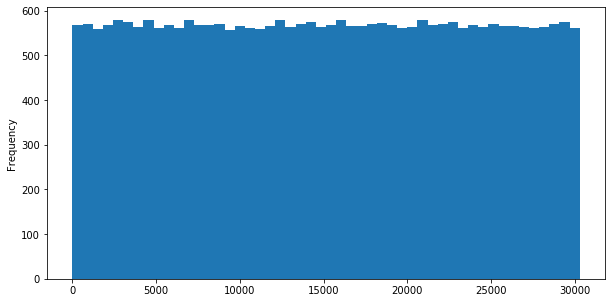

UNIVARIATE ANALYSIS FOR vintage


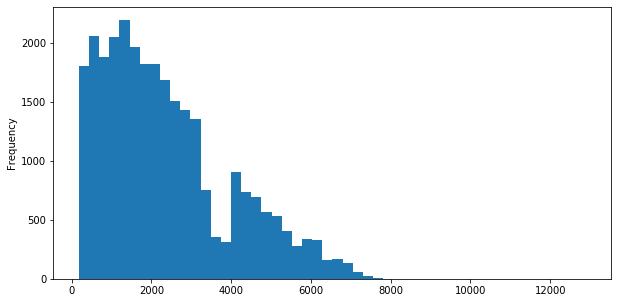

UNIVARIATE ANALYSIS FOR age


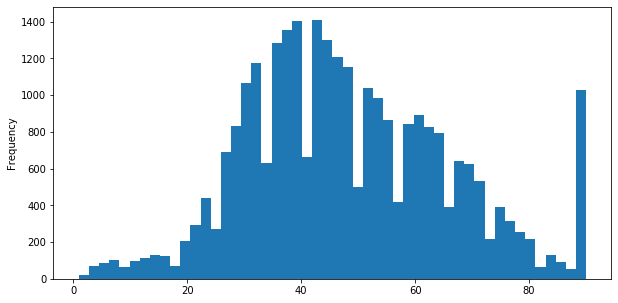

UNIVARIATE ANALYSIS FOR dependents


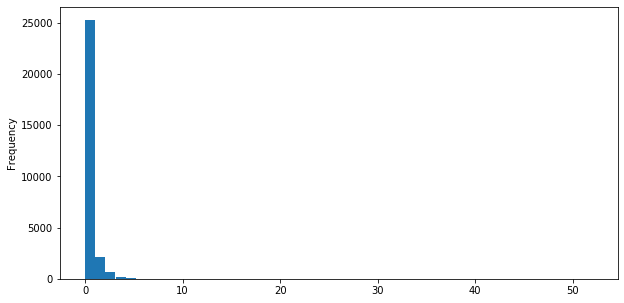

UNIVARIATE ANALYSIS FOR city


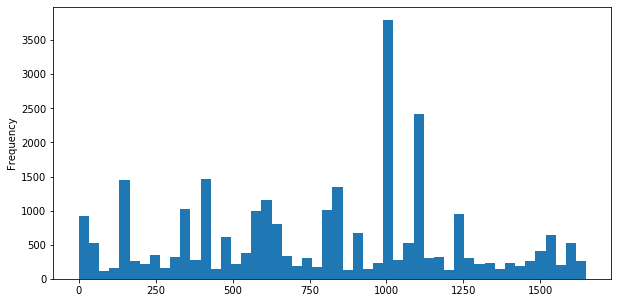

UNIVARIATE ANALYSIS FOR customer_nw_category


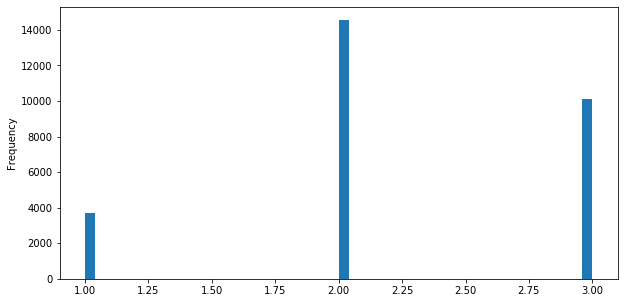

UNIVARIATE ANALYSIS FOR branch_code


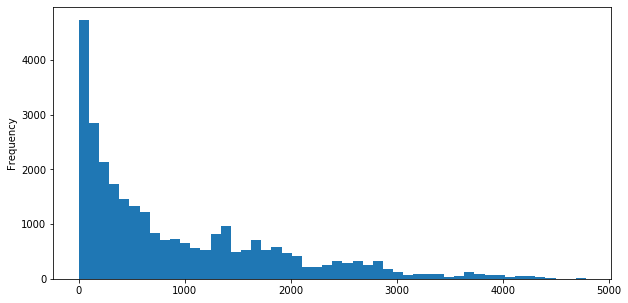

UNIVARIATE ANALYSIS FOR days_since_last_transaction


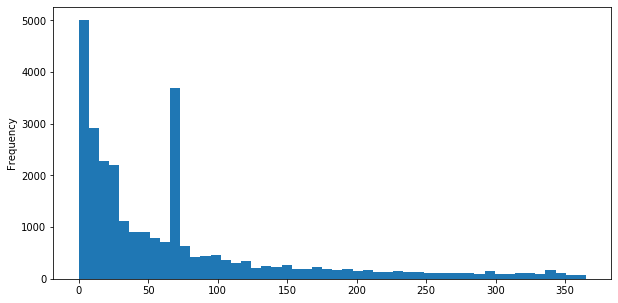

UNIVARIATE ANALYSIS FOR current_balance


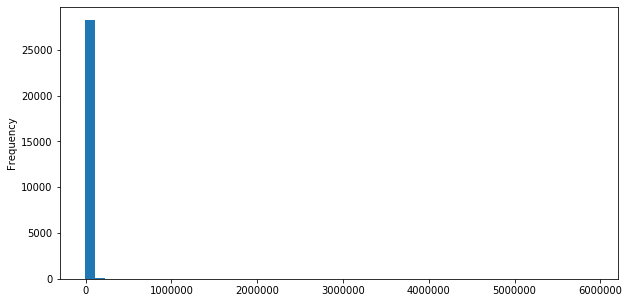

UNIVARIATE ANALYSIS FOR previous_month_end_balance


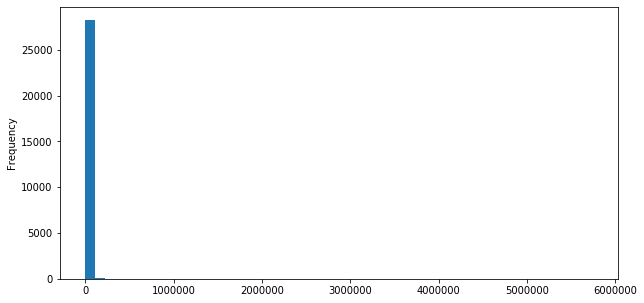

UNIVARIATE ANALYSIS FOR average_monthly_balance_prevQ


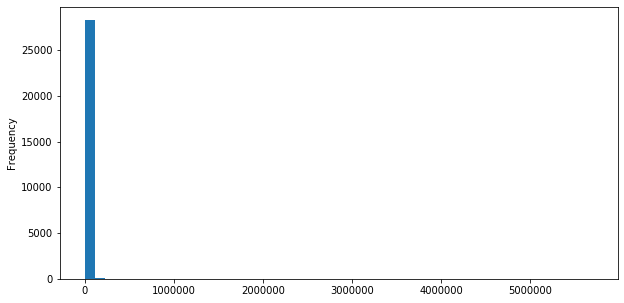

UNIVARIATE ANALYSIS FOR average_monthly_balance_prevQ2


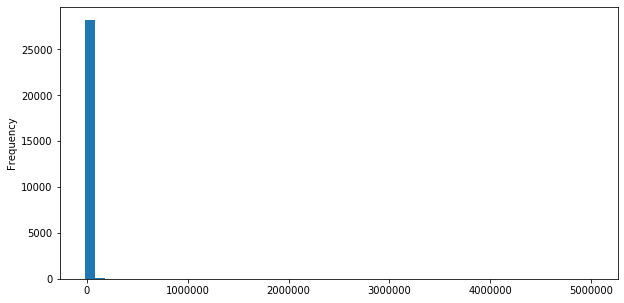

UNIVARIATE ANALYSIS FOR current_month_credit


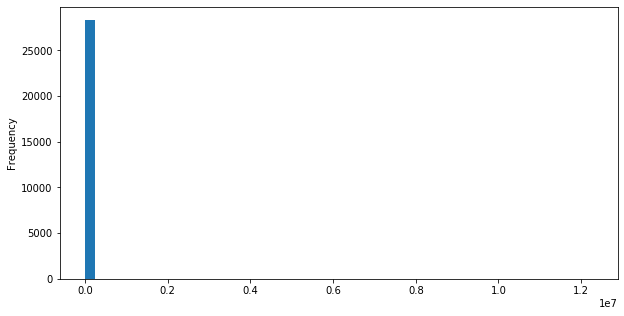

UNIVARIATE ANALYSIS FOR previous_month_credit


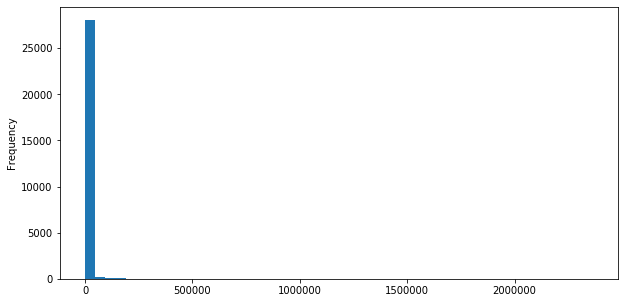

UNIVARIATE ANALYSIS FOR current_month_debit


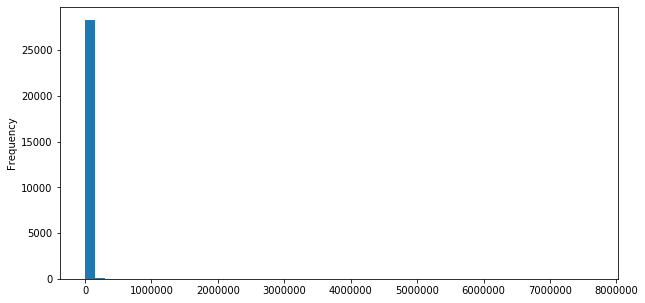

UNIVARIATE ANALYSIS FOR previous_month_debit


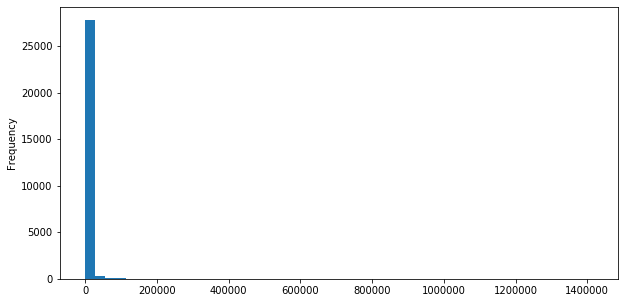

UNIVARIATE ANALYSIS FOR current_month_balance


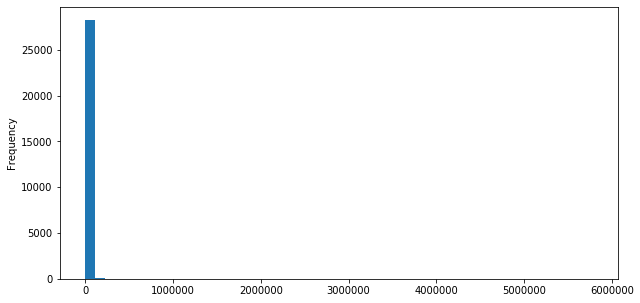

UNIVARIATE ANALYSIS FOR previous_month_balance


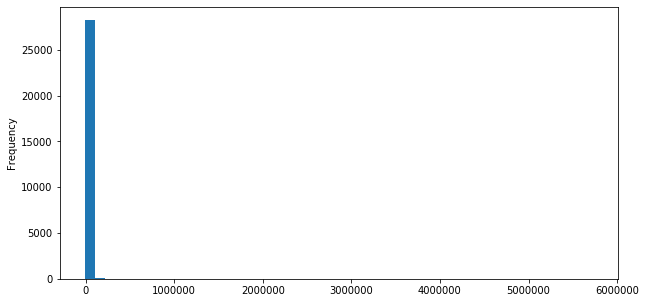

UNIVARIATE ANALYSIS FOR churn


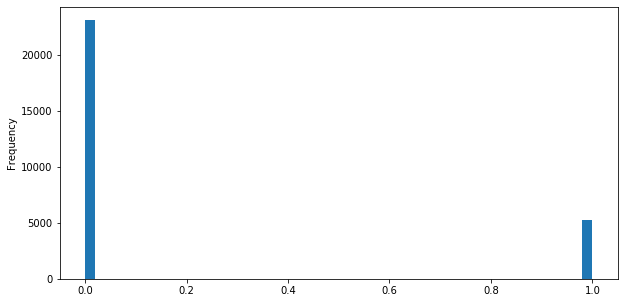

In [19]:
for i in temp:
    if data[i].dtypes != 'object':
        print("UNIVARIATE ANALYSIS FOR " + i)
        plt.figure(figsize = (10,5))
        data[i].plot.hist(bins = 50)
        #plt.xlabel(i)
        plt.show()

In [20]:
data_new = data.copy()

In [21]:
data_new.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.000000,self_employed,187.000000,2,755,224.000000,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.000000,self_employed,796.109576,2,3214,60.000000,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.000000,salaried,146.000000,2,41,69.997814,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0.347236,self_employed,1020.000000,2,582,147.000000,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.000000,self_employed,1494.000000,3,388,58.000000,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [22]:
data_new.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

# Checking for Value Counts:-


In [23]:
data_new.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [24]:
temp_01 = ['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn']

for i in temp_01:
    print(" Value Counts for ", i)
    print(data[i].value_counts())
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

 Value Counts for  customer_id
2047     1
3403     1
15661    1
9518     1
21824    1
        ..
17053    1
23198    1
21151    1
10928    1
2049     1
Name: customer_id, Length: 28382, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
 Value Counts for  vintage
1432    25
1997    23
403     21
1718    20
1400    20
        ..
3903     1
6067     1
5614     1
3581     1
5703     1
Name: vintage, Length: 5473, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
 Value Counts for  age
90    1003
40     722
43     711
42     699
37     691
      ... 
3       34
89      24
88      20
2       17
1        4
Name: age, Length: 90, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
 Value Counts for  gender
Male      17073
Female    11309
Name: gender, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
 Value Counts for  dependents
0.000000     21435
0.347236      2463
2.000000      2150
1.000000      1395
3.000000

In [25]:
# Value Counts for gender and occupation

data["gender"].value_counts()

Male      17073
Female    11309
Name: gender, dtype: int64

In [26]:
data["occupation"].value_counts()

self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [27]:
data["gender"]= data["gender"].map({"Male":1,"Female":0})

In [28]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.000000,self_employed,187.000000,2,755,224.000000,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1,0.000000,self_employed,796.109576,2,3214,60.000000,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1,0.000000,salaried,146.000000,2,41,69.997814,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,1,0.347236,self_employed,1020.000000,2,582,147.000000,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1,2.000000,self_employed,1494.000000,3,388,58.000000,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [29]:
pd.get_dummies(data["occupation"]).head()

,company,retired,salaried,self_employed,student
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [30]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.000000,self_employed,187.000000,2,755,224.000000,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1,0.000000,self_employed,796.109576,2,3214,60.000000,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1,0.000000,salaried,146.000000,2,41,69.997814,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,1,0.347236,self_employed,1020.000000,2,582,147.000000,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1,2.000000,self_employed,1494.000000,3,388,58.000000,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [31]:
y = pd.get_dummies(data["occupation"])

In [32]:
y.columns

Index(['company', 'retired', 'salaried', 'self_employed', 'student'], dtype='object')

In [33]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [34]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.000000,self_employed,187.000000,2,755,224.000000,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1,0.000000,self_employed,796.109576,2,3214,60.000000,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1,0.000000,salaried,146.000000,2,41,69.997814,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,1,0.347236,self_employed,1020.000000,2,582,147.000000,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1,2.000000,self_employed,1494.000000,3,388,58.000000,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [35]:
data.drop(["occupation"], axis = 1, inplace = True)

In [36]:
data.head()

,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.000000,187.000000,2,755,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1,0.000000,796.109576,2,3214,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1,0.000000,146.000000,2,41,69.997814,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,1,0.347236,1020.000000,2,582,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1,2.000000,1494.000000,3,388,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [37]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn'],
      dtype='object')

In [38]:
for i in range(len(y.columns)):
    data.insert(5+i,y.columns[i],y[y.columns[i]])

In [39]:
data.head()

,customer_id,vintage,age,gender,dependents,company,retired,salaried,self_employed,student,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.000000,0,0,0,1,0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1,0.000000,0,0,0,1,0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1,0.000000,0,0,1,0,0,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,1,0.347236,0,0,0,1,0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1,2.000000,0,0,0,1,0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [40]:
data.describe()

,customer_id,vintage,age,gender,dependents,company,retired,salaried,self_employed,student,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.601543,0.347236,0.001409,0.071313,0.236206,0.618561,0.072511,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.489589,0.953388,0.037515,0.257351,0.424758,0.485748,0.259336,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,1.000000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [41]:
data.head()

,customer_id,vintage,age,gender,dependents,company,retired,salaried,self_employed,student,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.000000,0,0,0,1,0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1,0.000000,0,0,0,1,0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1,0.000000,0,0,1,0,0,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,1,0.347236,0,0,0,1,0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1,2.000000,0,0,0,1,0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [42]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'company',
       'retired', 'salaried', 'self_employed', 'student', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn'],
      dtype='object')

# Bivariate Analysis (After Tuning):-

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until 

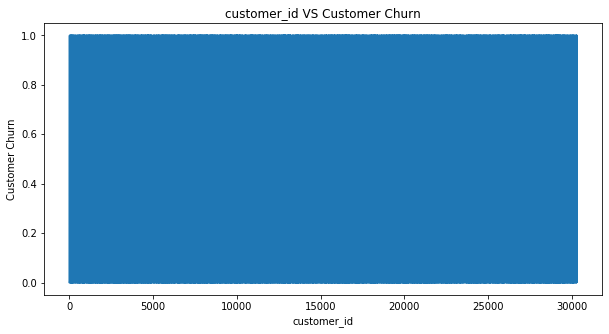

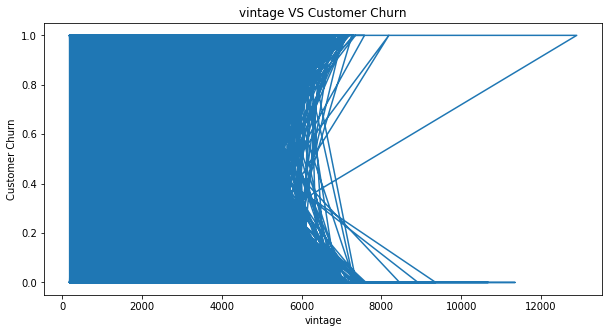

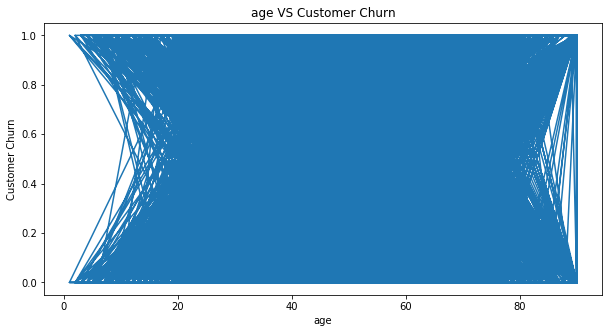

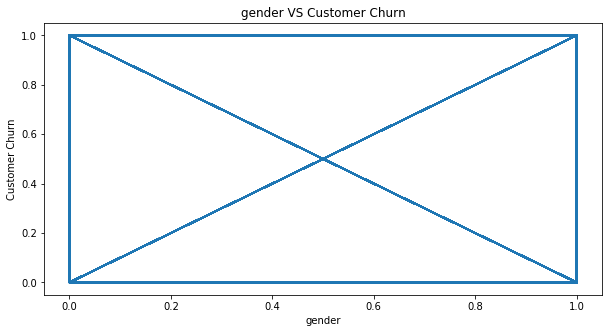

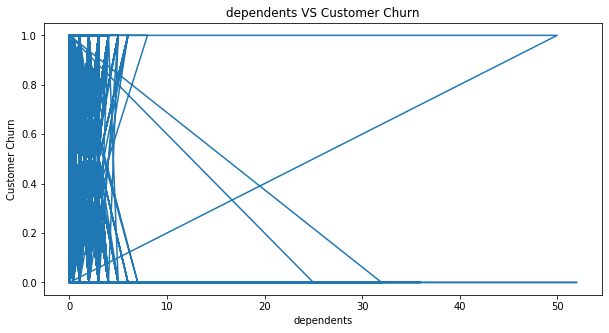

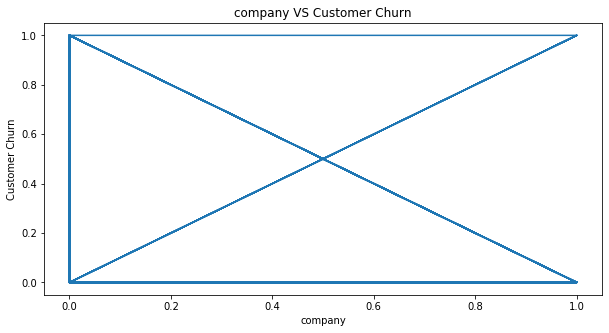

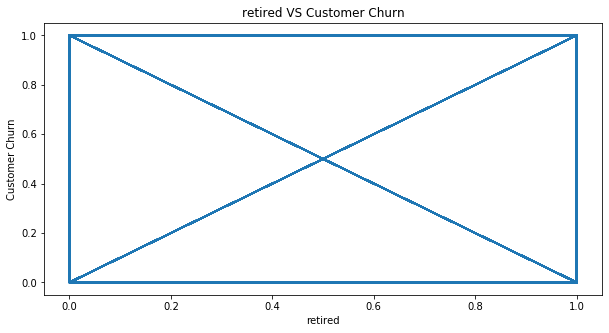

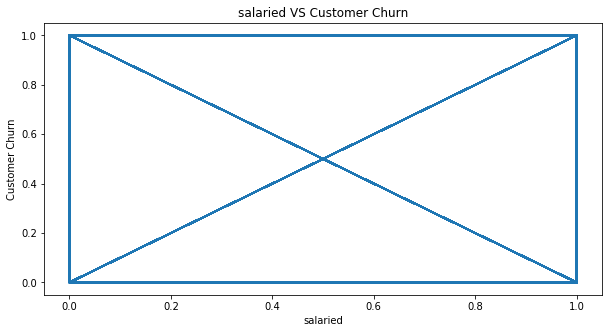

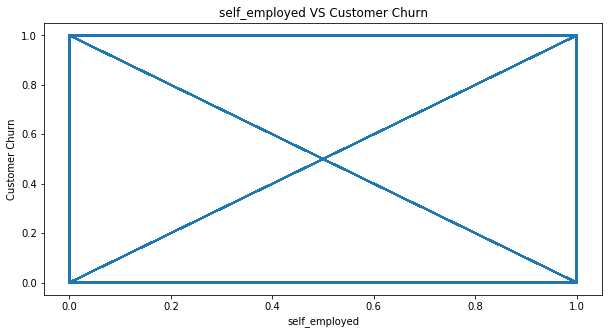

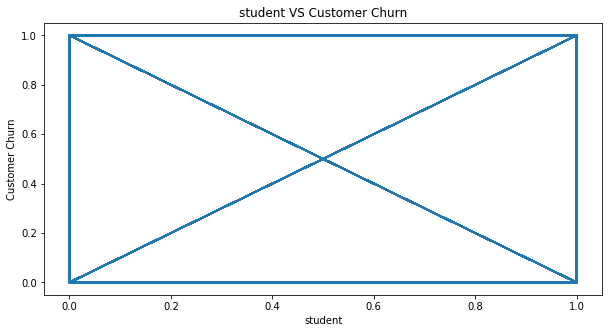

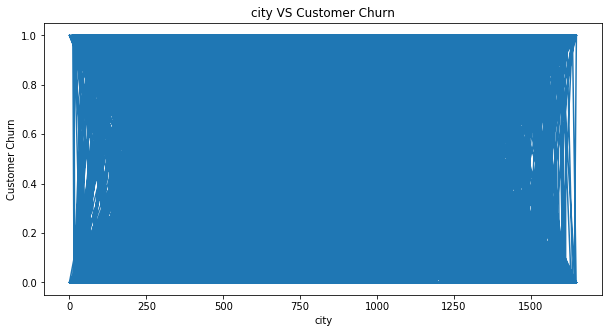

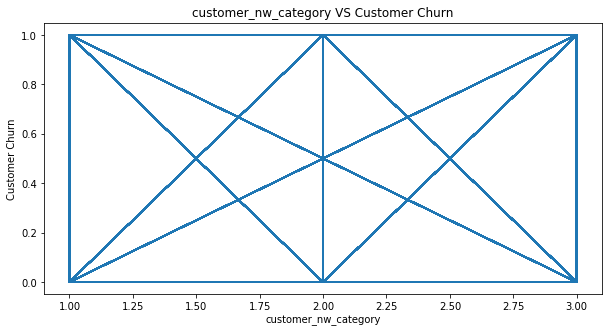

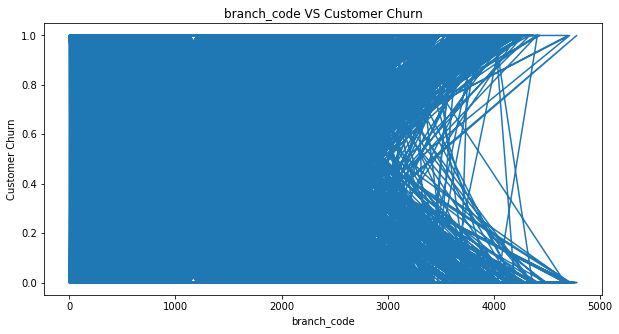

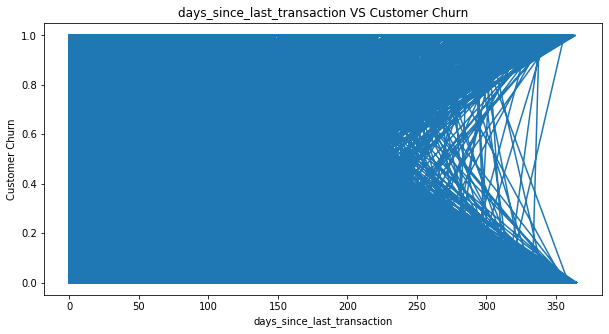

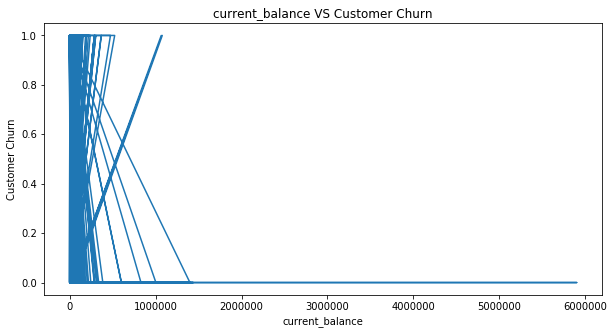

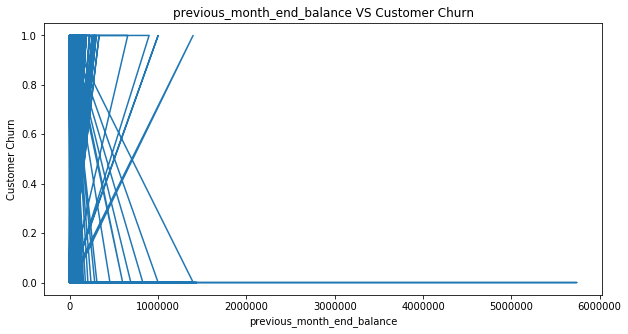

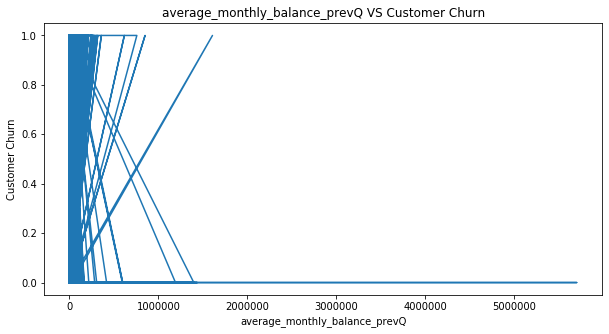

Error in callback <function flush_figures at 0x0000024B32C7C798> (for post_execute):



KeyboardInterrupt



Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000024B32BA2708> (for post_execute):


KeyboardInterrupt: 

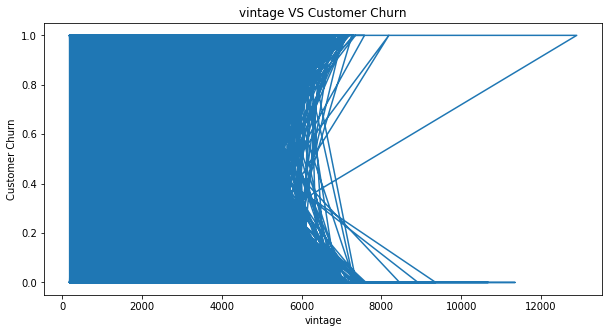

Error in callback <function flush_figures at 0x0000024B32C7C798> (for post_execute):


KeyboardInterrupt: 

In [50]:
temp2 = ['customer_id', 'vintage', 'age', 'gender', 'dependents', 'company',
       'retired', 'salaried', 'self_employed', 'student', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn']
for i in temp2:
    if data[i].dtypes!= 'object':
        plt.figure(figsize = (10,5))
        plt.plot(data[i],data["churn"])
        plt.xlabel(i)
        plt.ylabel("Customer Churn")
        plt.title(i + " VS Customer Churn")

# Modellng:-

In [43]:
# Separating Input and Output Variables:-

x = data.drop(["churn"],axis= 1)
y = data["churn"]

In [44]:
x.head()

,customer_id,vintage,age,gender,dependents,company,retired,salaried,self_employed,student,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,1,0.000000,0,0,0,1,0,...,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71
1,2,310,35,1,0.000000,0,0,0,1,0,...,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61
2,4,2356,31,1,0.000000,0,0,1,0,0,...,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14
3,5,478,90,1,0.347236,0,0,0,1,0,...,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79
4,6,2531,42,1,2.000000,0,0,0,1,0,...,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16


In [45]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: churn, dtype: int64

# Standerdization :-

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
# Standerising inputs:-
x = scaler.fit_transform(x)

In [49]:
print(x)

[[-1.73130444  0.47864443  0.99914719 ... -0.13742664 -0.14256405
  -0.14226472]
 [-1.73119011 -1.27590918 -0.74175593 ... -0.13329672 -0.02270474
   0.03045947]
 [-1.73096144 -0.00517761 -0.96638859 ... -0.12676727 -0.0581648
  -0.05715217]
 ...
 [ 1.7327888  -1.28398323 -0.06785795 ... -0.13448022  1.27583362
   1.18000495]
 [ 1.73290314  0.13704992  0.10061655 ... -0.13742664 -0.1385948
  -0.13833271]
 [ 1.73301747 -0.00952517 -1.69644473 ... -0.09241186 -0.12010775
  -0.09979906]]


# Train_Test_Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train , y_test =  train_test_split(x,y, random_state= 20, stratify =  y , test_size = 0.2)

In [52]:
x_train

array([[-1.05719084, -0.40515372, -1.35949574, ..., -0.1374143 ,
        -0.094001  , -0.12666418],
       [ 1.3893293 ,  0.39231418, -0.57328143, ..., -0.06392706,
        -0.12449785, -0.114665  ],
       [ 1.45244169,  1.14630643, -0.06785795, ..., -0.06981579,
        -0.14465263, -0.13249149],
       ...,
       [-1.43357856,  0.21530612, -0.12401611, ...,  0.07144444,
        -0.16570385, -0.11400817],
       [-0.46071007, -0.62750069, -0.74175593, ...,  0.44365454,
        -0.14759602, -0.108664  ],
       [ 0.71533003,  0.92209621, -0.01169978, ..., -0.08278662,
        -0.04080115, -0.02323541]])

In [53]:
x_test

array([[-0.70264093,  0.2289699 , -0.68559776, ..., -0.1374324 ,
        -0.10011641, -0.10681159],
       [ 1.13985238, -0.5653926 , -0.23633244, ...,  0.09772148,
        -0.11686507, -0.1192331 ],
       [-0.29000933,  2.17667968,  0.26909104, ...,  0.29516983,
        -0.10114964, -0.0803391 ],
       ...,
       [-0.37358752, -0.86102712, -0.57328143, ..., -0.13741553,
        -0.10492903, -0.14190885],
       [ 1.4645611 ,  1.29847125,  1.05530535, ..., -0.13309178,
        -0.14006697, -0.13201472],
       [ 0.58979124, -0.81134065, -0.57328143, ..., -0.11821772,
         0.02403808, -0.06685258]])

In [54]:
y_train

5537     0
25567    0
26083    0
27736    0
27136    0
        ..
27712    0
23934    0
2437     0
10410    0
20053    0
Name: churn, Length: 22705, dtype: int64

In [55]:
y_test

8444     0
23538    0
11806    0
14843    0
21390    1
        ..
1998     0
21963    0
11110    0
26179    0
19017    0
Name: churn, Length: 5677, dtype: int64

# Calling Classifiers :- 

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
new_scaler = StandardScaler()
new_scaler.fit_transform(x_train,x_test)

array([[-1.06188926, -0.40198621, -1.35568356, ..., -0.13356939,
        -0.15145817, -0.20412836],
       [ 1.38910107,  0.39425005, -0.56988645, ..., -0.06238578,
        -0.20350452, -0.18396064],
       [ 1.45232879,  1.14707778, -0.06473117, ..., -0.0680899 ,
        -0.23790096, -0.21392266],
       ...,
       [-1.4389647 ,  0.21751537, -0.12085954, ...,  0.0687422 ,
        -0.27382727, -0.18285668],
       [-0.46431862, -0.62398977, -0.73827155, ...,  0.42928455,
        -0.24292419, -0.17387441],
       [ 0.7138703 ,  0.92321385, -0.00860281, ..., -0.08065413,
        -0.06066655, -0.03028964]])

In [58]:
# Fitting into models
classifier1 = LogisticRegression()
classifier1.fit(x_train,y_train)

classifier2 = KNeighborsClassifier()
classifier2.fit(x_train,y_train)

classifier3 = RandomForestClassifier()
classifier3.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
y_pred1 = classifier1.predict(x_test)

In [60]:
y_pred2 = classifier2.predict(x_test)

In [61]:
y_pred3 = classifier3.predict(x_test)

In [62]:
y_pred1, y_pred2, y_pred3 

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

# Checking Accuracy

In [63]:
# Imp[orting Metrics
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score

print("***************************************************************************************************************")
print("For Logistic Regression")
results1 = confusion_matrix(y_test, y_pred1)
print('Accuracy Score :',accuracy_score(y_test, y_pred1))
print( classification_report(y_test, y_pred1))
print("***************************************************************************************************************")

print("For KNN Classifier")
results2 = confusion_matrix(y_test, y_pred2)
print('Accuracy Score :',accuracy_score(y_test, y_pred2))
print( classification_report(y_test, y_pred2))
print("***************************************************************************************************************")


print("For Random Forest")
results3 = confusion_matrix(y_test, y_pred3)
print('Accuracy Score :',accuracy_score(y_test, y_pred3))
print( classification_report(y_test, y_pred3))
print("***************************************************************************************************************")

***************************************************************************************************************
For Logistic Regression
Accuracy Score : 0.8233221772062709
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      4625
           1       0.75      0.07      0.13      1052

    accuracy                           0.82      5677
   macro avg       0.79      0.53      0.51      5677
weighted avg       0.81      0.82      0.76      5677

***************************************************************************************************************
For KNN Classifier
Accuracy Score : 0.7965474722564735
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4625
           1       0.29      0.07      0.11      1052

    accuracy                           0.80      5677
   macro avg       0.56      0.52      0.50      5677
weighted avg       0.72      0.80      0.74      5677

*******

# Visualization

Text(0.5, 1.0, 'Actual Churn VS Predicted (Logistic Regression) Churn')

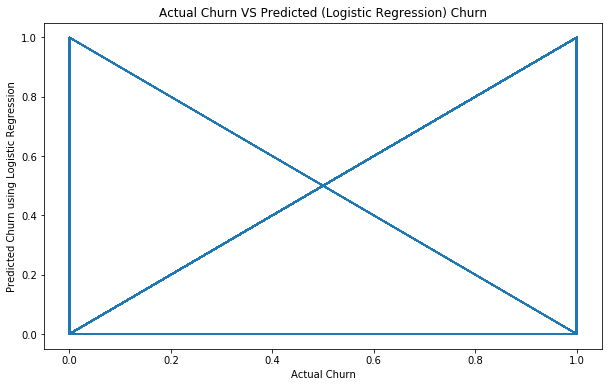

In [64]:
plt.figure(figsize = (10,6))
plt.plot(y_test,y_pred1)
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Churn using Logistic Regression")
plt.title("Actual Churn VS Predicted (Logistic Regression) Churn")

Text(0.5, 1.0, 'Actual Churn VS Predicted (KNN) Churn')

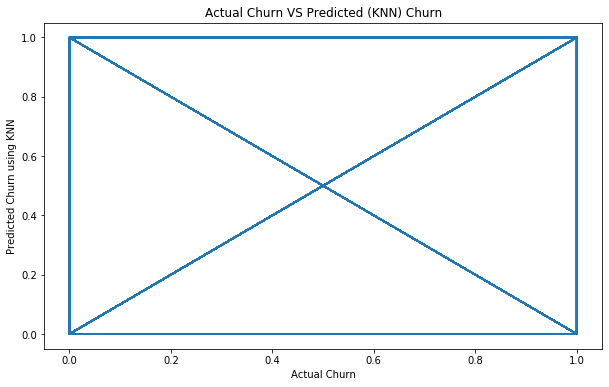

In [65]:
plt.figure(figsize = (10,6))
plt.plot(y_test,y_pred2)
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Churn using KNN")
plt.title("Actual Churn VS Predicted (KNN) Churn")

Text(0.5, 1.0, 'Actual Churn VS Predicted (Random Forest) Churn')

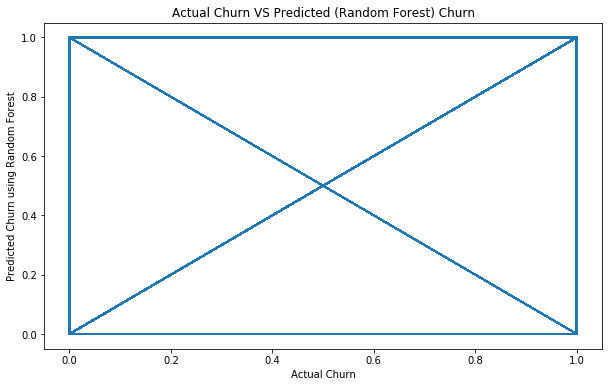

In [66]:
plt.figure(figsize = (10,6))
plt.plot(y_test,y_pred3)
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Churn using Random Forest")
plt.title("Actual Churn VS Predicted (Random Forest) Churn")

# Model Ensembling:-

In [67]:
from sklearn.ensemble import VotingClassifier

#classifier1 = LogisticRegression()
#classifier1.fit(x_train,y_train)

#classifier2 = KNeighborsClassifier()
#classifier2.fit(x_train,y_train)

#classifier3 = RandomForestClassifier()
#classifier3.fit(x_train,y_train)

evc = VotingClassifier(estimators = [
                                    ("Logistic Regression",classifier1), 
                                    ("KNeighborsClassifier",classifier2), 
                                    ("RandomForestClassifier",classifier3)]
                                    ,voting = 'hard')

In [68]:
evc.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(algorithm='auto',...
                                                     criterion='gini',
                                                     max_depth=None,
       

In [69]:
LR_SCORE = classifier1.score(x_test,y_test)
KNN_SCORE  = classifier2.score(x_test,y_test)
RANDOM_FOREST_SCORE = classifier3.score(x_test,y_test)
ENSEMBLE_SCORE = evc.score(x_test,y_test)

In [70]:
# Creating a DataFrame to show results:-

my_dict = {"LR_SCORE":[LR_SCORE],
           "KNN_SCORE":[KNN_SCORE],
           "RANDOM_FOREST_SCORE":[RANDOM_FOREST_SCORE],
           "ENSEMBLE_SCORE":[ENSEMBLE_SCORE]
          }

In [71]:
Final_Results = pd.DataFrame(my_dict)
Final_Results.index.names = [None]

In [72]:
Final_Results

,LR_SCORE,KNN_SCORE,RANDOM_FOREST_SCORE,ENSEMBLE_SCORE
0,0.823322,0.796547,0.866479,0.825612
